In [1]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
from nltk.tokenize import word_tokenize


# Load the dataset
file_path = 'cleaned_customer_say_reviews.csv'
try:
    data = pd.read_csv(file_path)
    # Display basic information and a preview of the dataset
    print("Dataset Information:")
    print(data.info())
    print("\nDataset Preview:")
    print(data.head())
except Exception as e:
    print(f"Error loading the dataset: {e}")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  223 non-null    object
 1   Price                 223 non-null    int64 
 2   Count                 223 non-null    int64 
 3   Positive Review       223 non-null    int64 
 4   Negative Review       223 non-null    int64 
 5   Detailed Review Text  223 non-null    object
 6   Review 2              223 non-null    object
 7   Review 3              223 non-null    object
 8   Review 4              214 non-null    object
 9   Key Features          223 non-null    object
dtypes: int64(4), object(6)
memory usage: 17.6+ KB
None

Dataset Preview:
                                               Name   Price  Count  \
0  Colgate Visible White Purple Toothpaste For Te...    278     59   
1  Colgate Visible White Purple Toothpaste For Te...    278 

In [2]:
data.head(2)

Name   Price  Count  \
0  Colgate Visible White Purple Toothpaste For Te...    278     59   
1  Colgate Visible White Purple Toothpaste For Te...    278     46   

   Positive Review  Negative Review  \
0               51                8   
1               35               11   

                                Detailed Review Text  \
0   Customers like the whitening effect of the to...   
1   Customers appreciate the quality of the tooth...   

                                            Review 2  \
0   It works wonder on my teeth. Making them visi...   
1                        for hours. Great product!     

                                            Review 3  \
0   Iska after taste bhi kafi achcha h . Teeth bh...   
1   This is a good toothpaste, it helped a lot in...   

                                            Review 4     Key Features   
0   Its aftertaste is also quite good. Teeth also...  Whitening effect  
1                                       Best result,           Quality

In [4]:
# Data Cleaning

# Rename duplicate column for clarity
data = data.rename(columns={"Key Features.1": "Additional Key Features"})

# Check and handle missing values in "Review 4"
data['Review 4'] = data['Review 4'].fillna("No additional review provided.")

# Verify the cleaned dataset
print("Cleaned Dataset Information:")
print(data.info())
print("\nCleaned Dataset Preview:")
print(data.head())


Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  223 non-null    object
 1   Price                 223 non-null    int64 
 2   Count                 223 non-null    int64 
 3   Positive Review       223 non-null    int64 
 4   Negative Review       223 non-null    int64 
 5   Detailed Review Text  223 non-null    object
 6   Review 2              223 non-null    object
 7   Review 3              223 non-null    object
 8   Review 4              223 non-null    object
 9   Key Features          223 non-null    object
dtypes: int64(4), object(6)
memory usage: 17.6+ KB
None

Cleaned Dataset Preview:
                                               Name   Price  Count  \
0  Colgate Visible White Purple Toothpaste For Te...    278     59   
1  Colgate Visible White Purple Toothpaste F

In [5]:
data.isna().sum()

Name                    0
Price                   0
Count                   0
Positive Review         0
Negative Review         0
Detailed Review Text    0
Review 2                0
Review 3                0
Review 4                0
Key Features            0
dtype: int64

In [6]:
data.duplicated().sum()

15

In [7]:
data.shape

(223, 10)

In [8]:
data.head(2)

Name   Price  Count  \
0  Colgate Visible White Purple Toothpaste For Te...    278     59   
1  Colgate Visible White Purple Toothpaste For Te...    278     46   

   Positive Review  Negative Review  \
0               51                8   
1               35               11   

                                Detailed Review Text  \
0   Customers like the whitening effect of the to...   
1   Customers appreciate the quality of the tooth...   

                                            Review 2  \
0   It works wonder on my teeth. Making them visi...   
1                        for hours. Great product!     

                                            Review 3  \
0   Iska after taste bhi kafi achcha h . Teeth bh...   
1   This is a good toothpaste, it helped a lot in...   

                                            Review 4     Key Features   
0   Its aftertaste is also quite good. Teeth also...  Whitening effect  
1                                       Best result,           Quality

In [9]:
print(data.columns)

Index(['Name ', 'Price', 'Count', 'Positive Review', 'Negative Review',
       'Detailed Review Text', 'Review 2', 'Review 3', 'Review 4',
       'Key Features '],
      dtype='object')


In [10]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Clean column names
data.columns = data.columns.str.strip()

# Combine the review columns into one for preprocessing
data['Combined Reviews'] = data[['Detailed Review Text', 'Review 2', 'Review 3', 'Review 4']].fillna('').agg(' '.join, axis=1)

# Define a preprocessing function for text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing to the combined reviews
data['Processed Reviews'] = data['Combined Reviews'].apply(preprocess_text)

# Sentiment labels (simplified for demonstration)
data['Sentiment'] = np.where(data['Positive Review'] > data['Negative Review'], 'positive', 'negative')
data['Sentiment'] = np.where((data['Positive Review'] == data['Negative Review']), 'neutral', data['Sentiment'])

# Split the dataset into training and testing sets
X = data['Processed Reviews']
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a text classification pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords.words('english'))),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Train the model
text_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = text_clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
    positive       0.96      1.00      0.98        43

    accuracy                           0.96        45
   macro avg       0.48      0.50      0.49        45
weighted avg       0.91      0.96      0.93        45

Accuracy Score: 0.9555555555555556


C:\Users\Tisha Verma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tisha Verma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tisha Verma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
def compute_sentiment_score(group):
    sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
    group['Sentiment Score'] = group['Sentiment'].map(sentiment_mapping)
    return group['Sentiment Score'].mean()

# Compute sentiment score per product using product_name as the unique identifier
product_sentiment_scores = data.groupby('Name').apply(compute_sentiment_score)
print("Overall Sentiment Scores per Product:")
print(product_sentiment_scores)


Overall Sentiment Scores per Product:
Name
Close Up Toothpaste | Long lasting 18 Hours Of Fresh Breath & White Teeth - 600g (Pack of 4)                                                                                                                                 1.000000
Closeup Multi Action Toothpaste Lemon & Sea Salt | Whiter Teeth In 2 Weeks - 300 Gm                                                                                                                                          1.000000
Clove Hydrate Toothpaste | Dry Mouth Solution | Strengthens Mouth's Natural Defense Systems | Boosts Saliva Production | Fights Bad Breath | Sugar Free | Triclosan Free | Paraben Free | Peroxide free| Pack of 1 (100g)    1.000000
Clove Ultimate Toothpaste | Active Freshness | Cavity Prevention | Teeth Whitening | Healthy Gums & Oral Care | Triclosan Free | Paraben Free | Peroxide free | Mint | Pack of 1 (100 gms)                                   0.875000
Colgate Active Salt Neem Toothpaste, 

In [12]:
data.head(5)

Name  Price  Count  \
0  Colgate Visible White Purple Toothpaste For Te...    278     59   
1  Colgate Visible White Purple Toothpaste For Te...    278     46   
2  Colgate Visible White Purple Toothpaste For Te...    278     33   
3  Colgate Visible White Purple Toothpaste For Te...    278     24   
4  Colgate Visible White Purple Toothpaste For Te...    278     17   

   Positive Review  Negative Review  \
0               51                8   
1               35               11   
2               24                9   
3               24                0   
4               17                0   

                                Detailed Review Text  \
0   Customers like the whitening effect of the to...   
1   Customers appreciate the quality of the tooth...   
2   Customers like the toothpaste's effectiveness...   
3   Customers like the color of the tooth cleanin...   
4   Customers enjoy the minty taste that lasts al...   

                                            Review 2  \
0   It works wonder on my teeth. Making them visi...   
1                        for hours. Great product!     
2   It works wonder on my teeth. Making them visi...   
3   It gives a refreshing, minty taste. The fun p...   
4   It really works keep ur mouth whole day fresh...   

                                            Review 3  \
0   Iska after taste bhi kafi achcha h . Teeth bh...   
1   This is a good toothpaste, it helped a lot in...   
2   Immediate results can be observed. If you're ...   
3   I got this from Amazon, and the purple foam r...   
4   My teeth are noticeably brighter, and my brea...   

                                            Review 4      Key Features  \
0   Its aftertaste is also quite good. Teeth also...  Whitening effect   
1                                       Best result,           Quality   
2         Not effective as per mention from 1st wash     Effectiveness   
3   The purple foam is fun, and the whitening eff...             Color   
4   It keeps my breath fresh for hours, which is ...  Breath freshness   

                                    Combined Reviews  \
0   Customers like the whitening effect of the to...   
1   Customers appreciate the quality of the tooth...   
2   Customers like the toothpaste's effectiveness...   
3   Customers like the color of the tooth cleanin...   
4   Customers enjoy the minty taste that lasts al...   

                                   Processed Reviews Sentiment  
0  customers like the whitening effect of the too...  positive  
1  customers appreciate the quality of the toothp...  positive  
2  customers like the toothpastes effectiveness t...  positive  
3  customers like the color of the tooth cleaning...  positive  
4  customers enjoy the minty taste that lasts all...  positive

The best product based on reviews is: Close Up Toothpaste | Long lasting 18 Hours Of Fresh Breath & White Teeth - 600g (Pack of 4)
The worst product based on reviews is: Colgate Visible White O2, Teeth Whitening Toothpaste (50g) for noticeably whiter teeth starting in 3 days with Active Technology, Enamel Safe Teeth Whitening & Fresh Breath


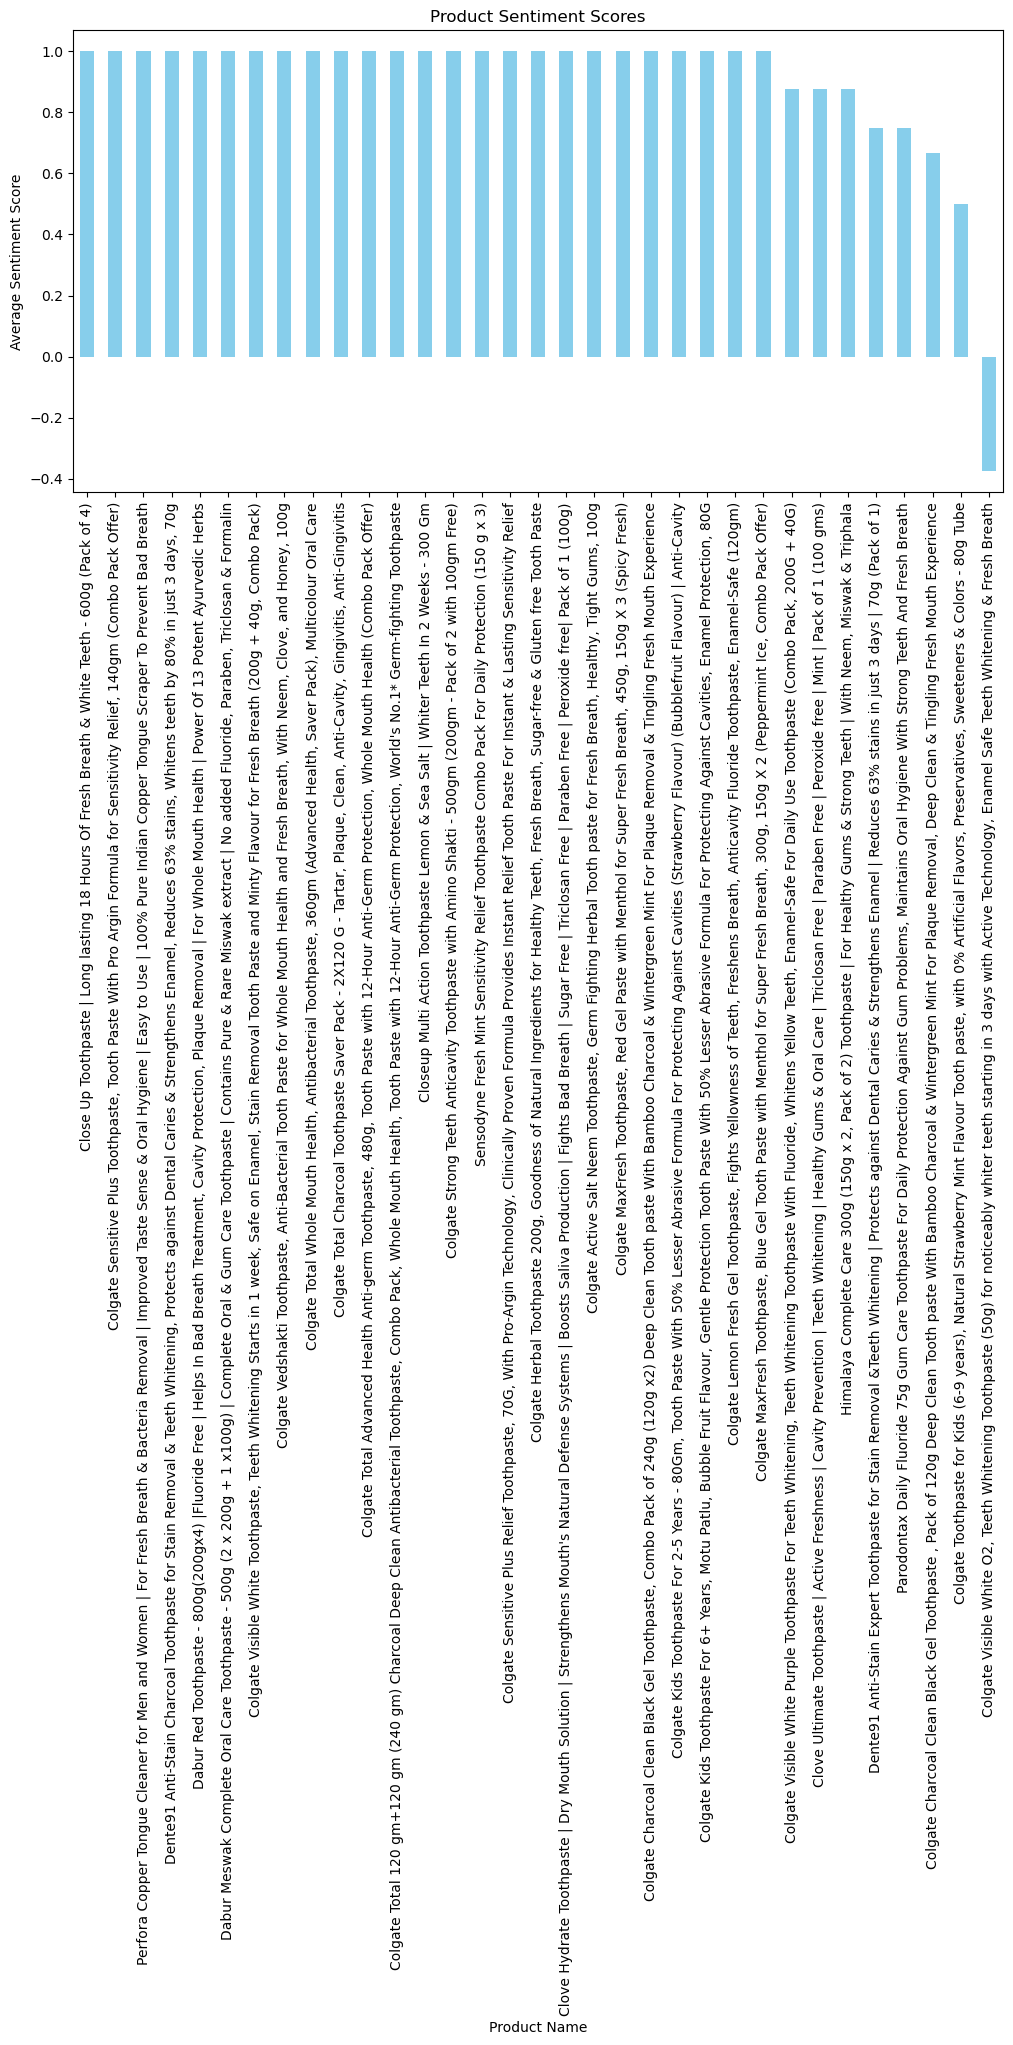

In [13]:
best_product = product_sentiment_scores.idxmax()  # Product with the highest sentiment score
worst_product = product_sentiment_scores.idxmin()  # Product with the lowest sentiment score

# Print the best and worst products
print(f"The best product based on reviews is: {best_product}")
print(f"The worst product based on reviews is: {worst_product}")

# If you want to also visualize the ranking of products:
product_sentiment_scores.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Product Sentiment Scores')
plt.xlabel('Product Name')
plt.ylabel('Average Sentiment Score')
plt.show()

In [14]:
def extract_aspects_and_sentiment(text):
    # Tokenize text
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Example aspects (customize as needed)
    aspects = ['taste', 'packaging', 'durability', 'price', 'performance']
    aspect_sentiments = defaultdict(list)
    
    for aspect in aspects:
        if aspect in tokens:
            if 'good' in tokens or 'great' in tokens:
                aspect_sentiments[aspect].append('positive')
            elif 'bad' in tokens or 'poor' in tokens:
                aspect_sentiments[aspect].append('negative')
            else:
                aspect_sentiments[aspect].append('neutral')
    
    return dict(aspect_sentiments)

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Tisha
[nltk_data]     Verma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Tisha
[nltk_data]     Verma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to C:\Users\Tisha
[nltk_data]     Verma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


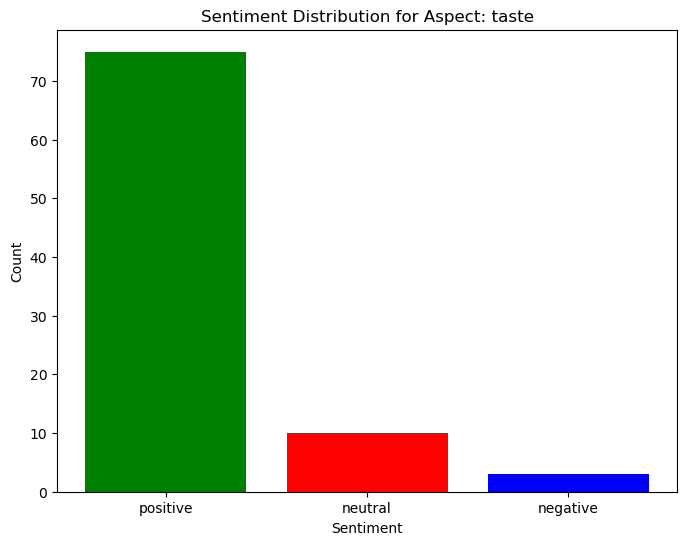

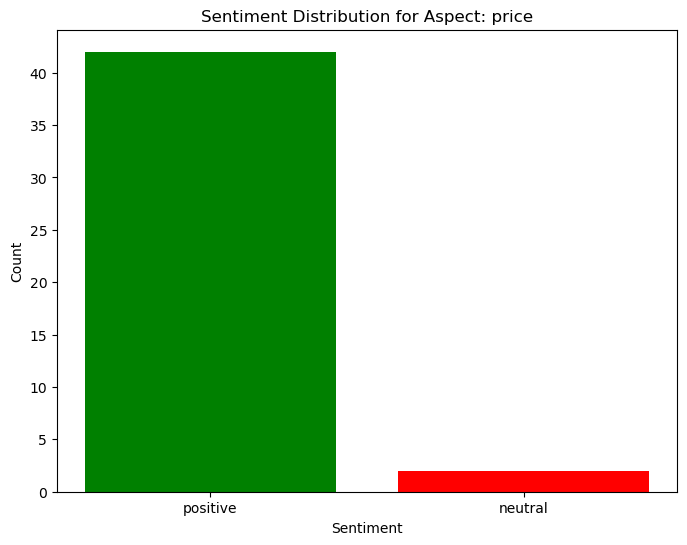

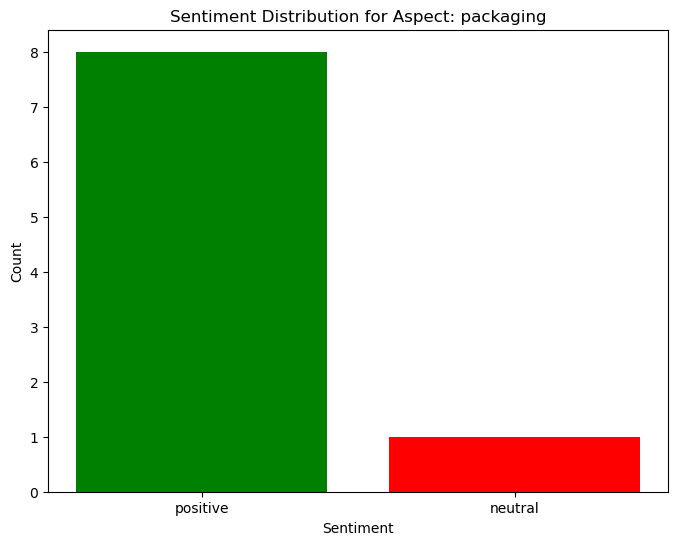

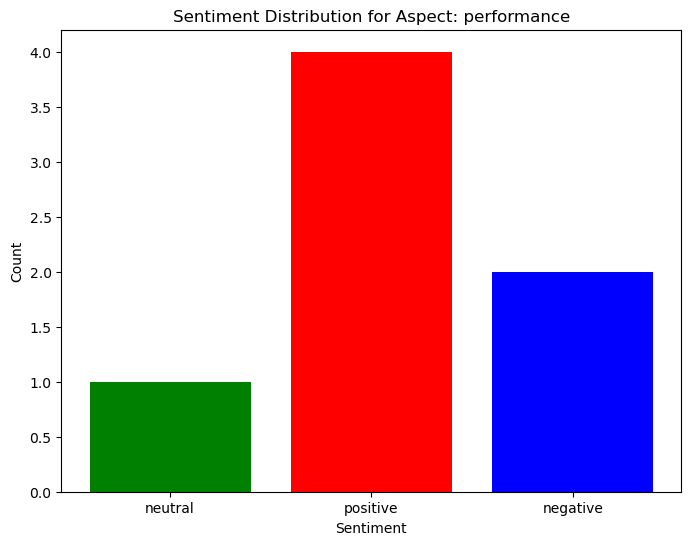

In [17]:
from nltk.corpus import stopwords
from collections import defaultdict
import matplotlib.pyplot as plt

# Make sure stopwords are downloaded
nltk.download('stopwords')

# Define the function to extract aspects and sentiment
def extract_aspects_and_sentiment(text):
    # Tokenize text
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Example aspects (customize as needed)
    aspects = ['taste', 'packaging', 'durability', 'price', 'performance']
    aspect_sentiments = defaultdict(list)
    
    for aspect in aspects:
        if aspect in tokens:
            if 'good' in tokens or 'great' in tokens:
                aspect_sentiments[aspect].append('positive')
            elif 'bad' in tokens or 'poor' in tokens:
                aspect_sentiments[aspect].append('negative')
            else:
                aspect_sentiments[aspect].append('neutral')
    
    return dict(aspect_sentiments)

# Assuming 'data' is already defined and contains the reviews
data['Aspect Sentiments'] = data['Processed Reviews'].apply(extract_aspects_and_sentiment)

# Visualize aspect sentiments
aspect_sentiment_counts = defaultdict(lambda: defaultdict(int))
for aspect_sentiments in data['Aspect Sentiments']:
    for aspect, sentiments in aspect_sentiments.items():
        for sentiment in sentiments:
            aspect_sentiment_counts[aspect][sentiment] += 1

# Bar chart for aspect sentiments
for aspect, sentiment_counts in aspect_sentiment_counts.items():
    plt.figure(figsize=(8, 6))
    plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['green', 'red', 'blue'])
    plt.title(f'Sentiment Distribution for Aspect: {aspect}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()


In [18]:
data.head(20)

Name  Price  Count  \
0   Colgate Visible White Purple Toothpaste For Te...    278     59   
1   Colgate Visible White Purple Toothpaste For Te...    278     46   
2   Colgate Visible White Purple Toothpaste For Te...    278     33   
3   Colgate Visible White Purple Toothpaste For Te...    278     24   
4   Colgate Visible White Purple Toothpaste For Te...    278     17   
5   Colgate Visible White Purple Toothpaste For Te...    278     17   
6   Colgate Visible White Purple Toothpaste For Te...    278     15   
7   Colgate Visible White Purple Toothpaste For Te...    278     18   
8   Colgate Visible White Toothpaste, Teeth Whiten...    243     55   
9   Colgate Visible White Toothpaste, Teeth Whiten...    243     31   
10  Colgate Visible White Toothpaste, Teeth Whiten...    243     11   
11  Colgate Visible White Toothpaste, Teeth Whiten...    243      8   
12  Colgate Visible White Toothpaste, Teeth Whiten...    243      7   
13  Colgate Visible White Toothpaste, Teeth Whiten...    243      4   
14  Colgate Visible White Toothpaste, Teeth Whiten...    243      4   
15  Colgate Visible White O2, Teeth Whitening Toot...    176    107   
16  Colgate Visible White O2, Teeth Whitening Toot...    176     25   
17  Colgate Visible White O2, Teeth Whitening Toot...    176     98   
18  Colgate Visible White O2, Teeth Whitening Toot...    176     96   
19  Colgate Visible White O2, Teeth Whitening Toot...    176     26   

    Positive Review  Negative Review  \
0                51                8   
1                35               11   
2                24                9   
3                24                0   
4                17                0   
5                15                2   
6                15                0   
7                 9                9   
8                47                8   
9                27                4   
10               11                0   
11                8                0   
12                7                0   
13                4                0   
14                4                0   
15               88               19   
16               21                4   
17               44               54   
18               40               56   
19                9               17   

                                 Detailed Review Text  \
0    Customers like the whitening effect of the to...   
1    Customers appreciate the quality of the tooth...   
2    Customers like the toothpaste's effectiveness...   
3    Customers like the color of the tooth cleanin...   
4    Customers enjoy the minty taste that lasts al...   
5    Customers enjoy the refreshing minty taste of...   
6    Customers appreciate the freshness of the too...   
7    Customers have different views on the value f...   
8    Customers like the product's effectiveness. T...   
9    Customers appreciate the whitening effect of ...   
10   Customers appreciate the product's value for ...   
11   Customers like the product's appearance. They...   
12   Customers appreciate the mouth refreshment th...   
13   Customers like the cleaning ability of the pr...   
14   Customers like the minty taste of the tooth c...   
15   Customers appreciate the toothpaste's quality...   
16   Customers find the product effective for clea...   
17   Customers have different views on the toothpa...   
18   Customers have different views on the whiteni...   
19   Customers have different experiences with the...   

                                             Review 2  \
0    It works wonder on my teeth. Making them visi...   
1                         for hours. Great product!     
2    It works wonder on my teeth. Making them visi...   
3    It gives a refreshing, minty taste. The fun p...   
4    It really works keep ur mouth whole day fresh...   
5    Making them visible whiter after a week. It g...   
6    Making them visible whiter after a week. It g...   
7    hope it will wirk after few brush. okay at th...   
8    

In [19]:
data.tail(20)

Name  Price  Count  \
203  Dente91 Anti-Stain Expert Toothpaste for Stain...    170     33   
204  Dente91 Anti-Stain Expert Toothpaste for Stain...    170     30   
205  Dente91 Anti-Stain Expert Toothpaste for Stain...    170      7   
206  Dente91 Anti-Stain Expert Toothpaste for Stain...    170     56   
207  Dente91 Anti-Stain Charcoal Toothpaste for Sta...    189     87   
208  Dente91 Anti-Stain Charcoal Toothpaste for Sta...    189     34   
209  Dente91 Anti-Stain Charcoal Toothpaste for Sta...    189     34   
210  Dente91 Anti-Stain Charcoal Toothpaste for Sta...    189     30   
211  Dente91 Anti-Stain Charcoal Toothpaste for Sta...    189     24   
212  Dente91 Anti-Stain Charcoal Toothpaste for Sta...    189     21   
213  Dente91 Anti-Stain Charcoal Toothpaste for Sta...    189     18   
214  Dente91 Anti-Stain Charcoal Toothpaste for Sta...    189     17   
215  Sensodyne Fresh Mint Sensitivity Relief Toothp...    529    139   
216  Sensodyne Fresh Mint Sensitivity Relief Toothp...    529     58   
217  Sensodyne Fresh Mint Sensitivity Relief Toothp...    529     52   
218  Sensodyne Fresh Mint Sensitivity Relief Toothp...    529     16   
219  Sensodyne Fresh Mint Sensitivity Relief Toothp...    529     11   
220  Sensodyne Fresh Mint Sensitivity Relief Toothp...    529     11   
221  Sensodyne Fresh Mint Sensitivity Relief Toothp...    529     10   
222  Sensodyne Fresh Mint Sensitivity Relief Toothp...    529      8   

     Positive Review  Negative Review  \
203               33                0   
204               27                3   
205                7                0   
206                0               56   
207               87                0   
208               34                0   
209               34                0   
210               27                3   
211               24                0   
212               21                0   
213               18                0   
214               17                0   
215              128               11   
216               45               13   
217               47                5   
218               16                0   
219               11                0   
220                8                3   
221               10                0   
222                8                0   

                                  Detailed Review Text  \
203  Customers appreciate the freshness and flavor ...   
204  Customers enjoy the toothpaste's benefits for ...   
205  Customers like the toothpaste's scent. They sa...   
206  Customers are unhappy with the product's value...   
207  Customers like the toothpaste's quality. They ...   
208  Customers are satisfied with the product's eff...   
209  Customers like the stain removal. Reviewers sa...   
210  Customers appreciate the whitening effect of t...   
211  Customers like the freshness of the toothpaste...   
212  Customers enjoy the toothpaste's taste. They s...   
213  Customers appreciate the natural ingredients a...   
214  Customers appreciate the value for money of th...   
215  Customers are satisfied with the product quali...   
216  Customers appreciate the value for money. They...   
217  Customers find the product effective for sensi...   
218  Customers are satisfied with the product. They...   
219  Customers like the paste quality. They say it'...   
220  Customers enjoy the refreshing minty taste of ...   
221  Customers like the brand name. They mention it...   
222  Customers enjoy the freshness of the product. ...   

                                              Review 2  \
203  of this toothpaste is one I really like and gi...   
204  I can already see that my teeth are looking he...   
205  The toothpaste is refreshing and smells good. ...   
206  Has a good taste .....works well but too small...   
207  Overall, I highly recommend Dente91 for anyone...   
208  for anyone looking to enhance their oral care ...   
209  It delivers on its promises of stain removal 

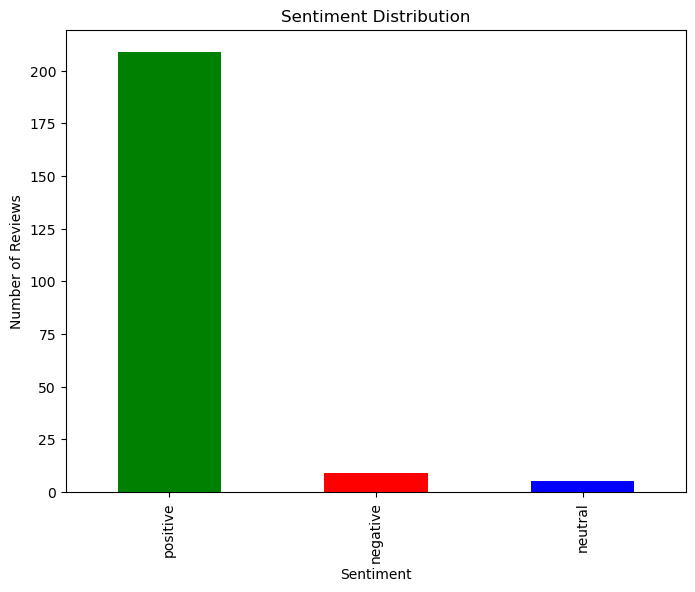

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
data['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [21]:
!pip install wordcloud

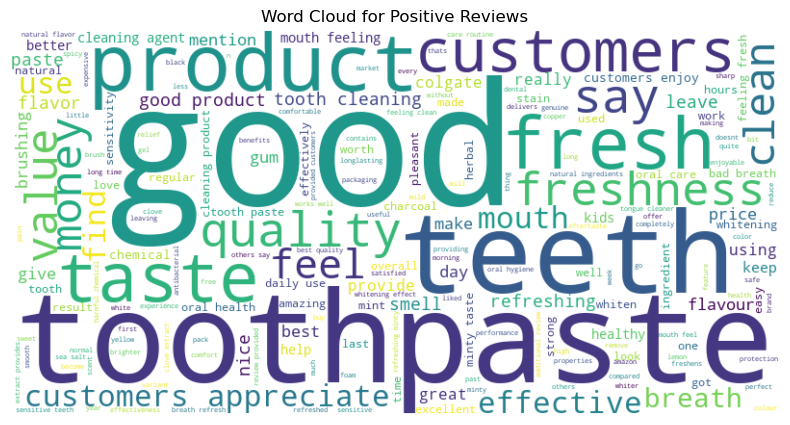

In [22]:
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
positive_reviews = ' '.join(data[data['Sentiment'] == 'positive']['Processed Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

In [23]:
vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
X_tfidf = vectorizer.fit_transform(data['Processed Reviews'])
keywords = vectorizer.get_feature_names_out()
print("Top Keywords Extracted:")
print(keywords)

Top Keywords Extracted:
['appreciate' 'breath' 'cleaning' 'customers' 'effective' 'fresh'
 'freshness' 'good' 'like' 'money' 'mouth' 'product' 'quality' 'say'
 'taste' 'teeth' 'tooth' 'toothpaste' 'use' 'value']


In [24]:
# Topic Modeling with LDA
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_topics = vectorizer.fit_transform(data['Processed Reviews'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_topics)


LatentDirichletAllocation(n_components=5, random_state=42)

In [25]:
# Relating Topics to Sentiment (Assuming LDA is being used)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
X_topics = lda.fit_transform(X_tfidf)

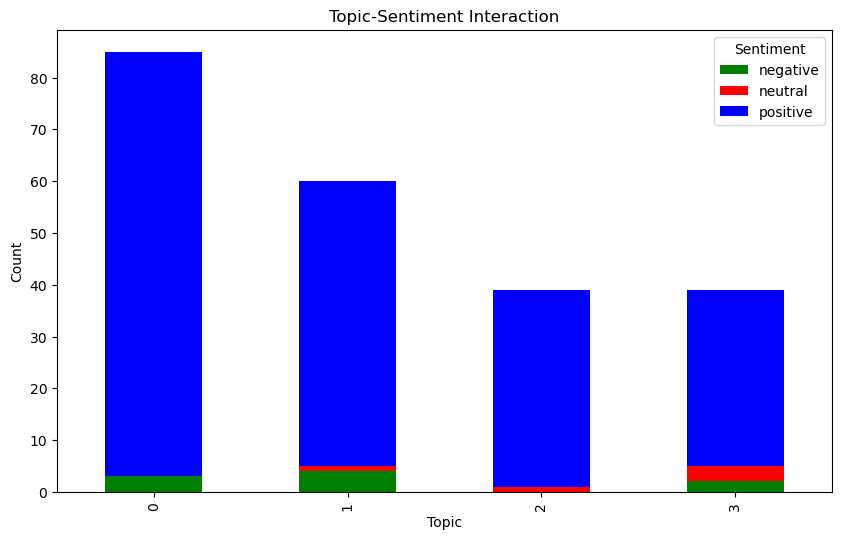

In [26]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure you've already defined your TF-IDF Vectorizer with max_features=20
vectorizer = TfidfVectorizer(max_features=20, stop_words='english')

# Transform the reviews using the same vectorizer for LDA
X_tfidf = vectorizer.fit_transform(data['Processed Reviews'])

# Train your LDA model using the transformed data
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_tfidf)

# Now transform the same data using the trained LDA model
topic_values = lda.transform(X_tfidf)

# Assign the dominant topic for each product
data['Dominant Topic'] = topic_values.argmax(axis=1)

# Combine dominant topics with sentiment for visualization
topic_sentiment_counts = pd.crosstab(data['Dominant Topic'], data['Sentiment'])
topic_sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red', 'blue'])
plt.title('Topic-Sentiment Interaction')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()


In [27]:
# Display the top words for each topic
print("Top words for each topic:")
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_features = [feature_names[i] for i in topic.argsort()[-10:]]
    print(f"Topic {topic_idx + 1}: {', '.join(top_features)}")

Top words for each topic:
Topic 1: customers, like, say, use, effective, toothpaste, quality, product, teeth, good
Topic 2: customers, teeth, tooth, fresh, mouth, like, good, freshness, cleaning, taste
Topic 3: taste, customers, like, good, freshness, toothpaste, teeth, mouth, fresh, breath
Topic 4: toothpaste, cleaning, tooth, customers, appreciate, quality, product, good, money, value
Topic 5: toothpaste, product, say, taste, use, customers, teeth, fresh, appreciate, effective


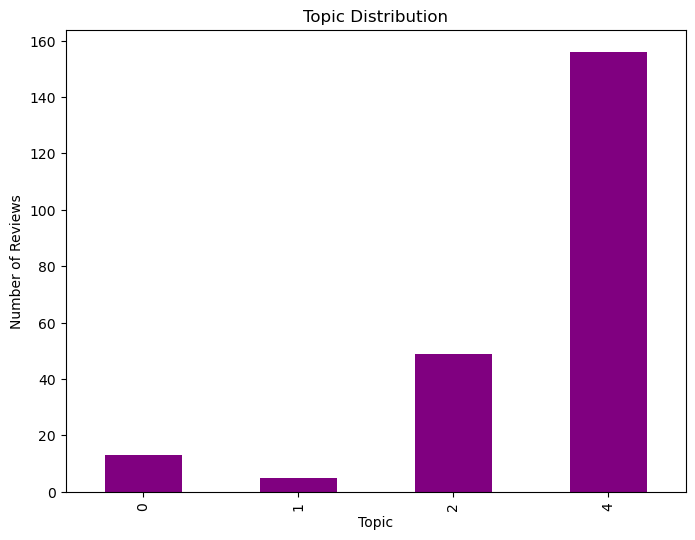

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Re-initialize CountVectorizer with the desired number of features
vectorizer = CountVectorizer(max_features=1343)  # Adjust to your dataset

# Fit and transform the data
X_topics = vectorizer.fit_transform(data['Processed Reviews'])  # Or 'Combined Reviews'

# Re-train the LDA model on the new data
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_topics)

# Transform the data with the newly trained LDA model
topic_values = lda.transform(X_topics)

# Add the dominant topic to the DataFrame
data['Dominant Topic'] = topic_values.argmax(axis=1)

# Plot the topic distribution
plt.figure(figsize=(8, 6))
data['Dominant Topic'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.show()


In [29]:
data.columns

Index(['Name', 'Price', 'Count', 'Positive Review', 'Negative Review',
       'Detailed Review Text', 'Review 2', 'Review 3', 'Review 4',
       'Key Features', 'Combined Reviews', 'Processed Reviews', 'Sentiment',
       'Aspect Sentiments', 'Dominant Topic'],
      dtype='object')

In [30]:
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords.words('english'))),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Train the model
text_clf.fit(X, y)

# Function to predict sentiment for a new review
def predict_sentiment(review):
    # Preprocess the review
    processed_review = preprocess_text(review)
    
    # Predict sentiment using the trained model
    sentiment = text_clf.predict([processed_review])[0]
    
    return sentiment

# Real-time review (example)
new_review = "This product is so WORST and didn't like it!"

# Get the sentiment for the new review
predicted_sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {predicted_sentiment}")


The sentiment of the review is: positive


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
from textblob import TextBlob

def get_sentiment(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Processed Reviews'].apply(get_sentiment)

# Aspect-Based Sentiment Analysis
aspects = ['durability', 'performance', 'price']  # Define key aspects

def aspect_sentiment(text, aspect):
    if aspect in text:
        return TextBlob(text).sentiment.polarity
    return None

for aspect in aspects:
    data[f'{aspect.capitalize()} Sentiment'] = data['Processed Reviews'].apply(lambda x: aspect_sentiment(x, aspect))

# Topic Modeling with LDA
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_topics = vectorizer.fit_transform(data['Processed Reviews'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_topics)

# Extract topics and keywords
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f'Topic {topic_idx + 1}'] = [feature_names[i] for i in topic.argsort()[-no_top_words:]]
    return topics

feature_names = vectorizer.get_feature_names_out()
data['topics'] = display_topics(lda, feature_names, 10)

# Keyword Extraction
all_keywords = ' '.join(data['Processed Reviews'])
word_counts = Counter(word_tokenize(all_keywords))
most_common_keywords = word_counts.most_common(20)

# Interactive Visualizations
# Sentiment Distribution
fig_sentiment = px.histogram(data, x='Sentiment', title='Sentiment Distribution', color='Sentiment')
fig_sentiment.show()

# Aspect-Based Sentiment Scores
aspect_scores = data[[f'{aspect.capitalize()} Sentiment' for aspect in aspects]].mean().reset_index()
aspect_scores.columns = ['Aspect', 'Average Sentiment']
fig_aspects = px.bar(aspect_scores, x='Aspect', y='Average Sentiment', title='Aspect-Based Sentiment Scores')
fig_aspects.show()

# Topic Modeling Visualization
fig_topics = go.Figure()
for topic, words in topics.items():
    fig_topics.add_trace(go.Bar(x=words, y=[1] * len(words), name=topic))

fig_topics.update_layout(title='Topics and Keywords', barmode='stack')
fig_topics.show()

# Export cleaned data and topics for further analysis
data.to_csv('processed_reviews_with_sentiment.csv', index=False)
with open('topics.json', 'w') as f:
    import json
    json.dump(topics, f)

print("Analysis completed and results saved.")


NameError: name 'topics' is not defined

In [32]:
data.columns

Index(['Name', 'Price', 'Count', 'Positive Review', 'Negative Review',
       'Detailed Review Text', 'Review 2', 'Review 3', 'Review 4',
       'Key Features', 'Combined Reviews', 'Processed Reviews', 'Sentiment',
       'Aspect Sentiments', 'Dominant Topic', 'Durability Sentiment',
       'Performance Sentiment', 'Price Sentiment', 'topics'],
      dtype='object')

In [33]:
import os

# Define the path to save the cleaned data
save_path = r"C:\Users\Tisha Verma\Desktop\Hackathon Hack-A-Stats\cleaned_Amazon_Reviews_new.csv"

# Assuming 'data' is your cleaned DataFrame
data.to_csv(save_path, index=False)

print(f"Cleaned data saved to: {save_path}")


Cleaned data saved to: C:\Users\Tisha Verma\Desktop\Hackathon Hack-A-Stats\cleaned_Amazon_Reviews_new.csv


In [34]:
data.columns

Index(['Name', 'Price', 'Count', 'Positive Review', 'Negative Review',
       'Detailed Review Text', 'Review 2', 'Review 3', 'Review 4',
       'Key Features', 'Combined Reviews', 'Processed Reviews', 'Sentiment',
       'Aspect Sentiments', 'Dominant Topic', 'Durability Sentiment',
       'Performance Sentiment', 'Price Sentiment', 'topics'],
      dtype='object')

In [35]:
data.tail(20)

Name  Price  Count  \
203  Dente91 Anti-Stain Expert Toothpaste for Stain...    170     33   
204  Dente91 Anti-Stain Expert Toothpaste for Stain...    170     30   
205  Dente91 Anti-Stain Expert Toothpaste for Stain...    170      7   
206  Dente91 Anti-Stain Expert Toothpaste for Stain...    170     56   
207  Dente91 Anti-Stain Charcoal Toothpaste for Sta...    189     87   
208  Dente91 Anti-Stain Charcoal Toothpaste for Sta...    189     34   
209  Dente91 Anti-Stain Charcoal Toothpaste for Sta...    189     34   
210  Dente91 Anti-Stain Charcoal Toothpaste for Sta...    189     30   
211  Dente91 Anti-Stain Charcoal Toothpaste for Sta...    189     24   
212  Dente91 Anti-Stain Charcoal Toothpaste for Sta...    189     21   
213  Dente91 Anti-Stain Charcoal Toothpaste for Sta...    189     18   
214  Dente91 Anti-Stain Charcoal Toothpaste for Sta...    189     17   
215  Sensodyne Fresh Mint Sensitivity Relief Toothp...    529    139   
216  Sensodyne Fresh Mint Sensitivity Relief Toothp...    529     58   
217  Sensodyne Fresh Mint Sensitivity Relief Toothp...    529     52   
218  Sensodyne Fresh Mint Sensitivity Relief Toothp...    529     16   
219  Sensodyne Fresh Mint Sensitivity Relief Toothp...    529     11   
220  Sensodyne Fresh Mint Sensitivity Relief Toothp...    529     11   
221  Sensodyne Fresh Mint Sensitivity Relief Toothp...    529     10   
222  Sensodyne Fresh Mint Sensitivity Relief Toothp...    529      8   

     Positive Review  Negative Review  \
203               33                0   
204               27                3   
205                7                0   
206                0               56   
207               87                0   
208               34                0   
209               34                0   
210               27                3   
211               24                0   
212               21                0   
213               18                0   
214               17                0   
215              128               11   
216               45               13   
217               47                5   
218               16                0   
219               11                0   
220                8                3   
221               10                0   
222                8                0   

                                  Detailed Review Text  \
203  Customers appreciate the freshness and flavor ...   
204  Customers enjoy the toothpaste's benefits for ...   
205  Customers like the toothpaste's scent. They sa...   
206  Customers are unhappy with the product's value...   
207  Customers like the toothpaste's quality. They ...   
208  Customers are satisfied with the product's eff...   
209  Customers like the stain removal. Reviewers sa...   
210  Customers appreciate the whitening effect of t...   
211  Customers like the freshness of the toothpaste...   
212  Customers enjoy the toothpaste's taste. They s...   
213  Customers appreciate the natural ingredients a...   
214  Customers appreciate the value for money of th...   
215  Customers are satisfied with the product quali...   
216  Customers appreciate the value for money. They...   
217  Customers find the product effective for sensi...   
218  Customers are satisfied with the product. They...   
219  Customers like the paste quality. They say it'...   
220  Customers enjoy the refreshing minty taste of ...   
221  Customers like the brand name. They mention it...   
222  Customers enjoy the freshness of the product. ...   

                                              Review 2  \
203  of this toothpaste is one I really like and gi...   
204  I can already see that my teeth are looking he...   
205  The toothpaste is refreshing and smells good. ...   
206  Has a good taste .....works well but too small...   
207  Overall, I highly recommend Dente91 for anyone...   
208  for anyone looking to enhance their oral care ...   
209  It delivers on its promises of stain removal 